<a href="https://colab.research.google.com/github/chadni00/CSE_303_Course/blob/main/lab_7_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

problem 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([[1,2],[3,4]], dtype=np.int32)
y = np.array([[5,6],[7,8]], dtype=np.int32)
v = np.array([9,10])
w = np.array([11,12])
# Inner product of vectors
print('Inner Product: ')
print(v.dot(w))
print(np.dot(v, w))
print(np.inner(v, w))
# Outer product of vectors
print('Outer Product: ')
print(np.outer(v,w))
# Norm of a vector / matrix
print('Norm: ')
print(np.linalg.norm(v)) #Euclidean
print(np.linalg.norm(v,1)) #Manhattan
print(np.linalg.norm(v,np.inf)) #Infinite
print(np.linalg.norm(x))
print(np.linalg.norm(x, axis = 1)) #0 for column, 1 for row

Inner Product: 
219
219
219
Outer Product: 
[[ 99 108]
 [110 120]]
Norm: 
13.45362404707371
19.0
10.0
5.477225575051661
[2.23606798 5.        ]


2. vector-matrix and Matrix Multiplication

In [3]:
# Matrix / vector product
print(x.dot(v))
print(np.dot(x, v))
# Matrix / matrix product (Matrix Multiplication)
print(x.dot(y))
print(np.dot(x, y))
print(np.matmul(x,y))
print(x @ y)

[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


3. Determinant, Trace and Rank of a Matrix

In [4]:
m = np.array([[2,4,6],
[1,5,9],
[3,7,8]])
# determinant of a matrix
print('Determinant: %.2f'%np.linalg.det(m))
# trace of a matrix
print('Trace: %.2f'%np.trace(m))
# rank of a matrix
print('Rank: ', np.linalg.matrix_rank(m))

Determinant: -18.00
Trace: 15.00
Rank:  3


4. Transpose and Inverse of a Matrix

In [9]:
# transpose of a matrix
mt1 = m.T
print(mt1)
mt2 = np.transpose(m)
print(mt2)
# inverse of a matrix
inv_m = np.linalg.inv(m)
print(inv_m)

[[2 1 3]
 [4 5 7]
 [6 9 8]]
[[2 1 3]
 [4 5 7]
 [6 9 8]]
[[ 1.27777778 -0.55555556 -0.33333333]
 [-1.05555556  0.11111111  0.66666667]
 [ 0.44444444  0.11111111 -0.33333333]]


5. Solving a Linear System

In [7]:
# Solving a linear system
# Ax = Z => x = inv(A). Z
A = np.array([[1, 2], [3, 4]])
z = np.array([[5], [6]])
# using inverse of a matrix
print('Using Inverse: \n' , np.linalg.inv(A).dot(z)) # slow computation
#using solve function
print('Using solve: \n', np.linalg.solve(A, z)) # fast computation

Using Inverse: 
 [[-4. ]
 [ 4.5]]
Using solve: 
 [[-4. ]
 [ 4.5]]


6. Least Square Solution to a Linear Matrix Equation

[[0. 1. 2. 3. 4. 5. 6. 7. 8.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[ 0.71666667 19.18888889]


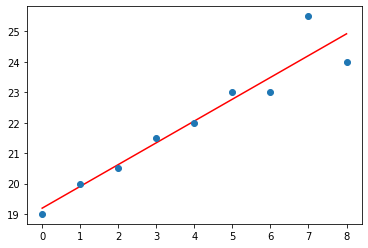

In [8]:
x = np.arange(0, 9)
A = np.array([x, np.ones(9)])
print (A)
# linearly generated sequence
y = [19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]
# obtaining the parameters of regression line
w = np.linalg.lstsq(A.T, y, rcond=None)[0]
print(w)
# plotting the line
line = w[0]*x + w[1] # regression line
plt.plot(x, line, 'r-')
plt.plot(x, y, 'o')
plt.show()

7. Eigenvalues and Eigenvectors

In [ ]:
A = np.array([[0,1],[-2,-3]])
#function to calculate eigenvalues and vector
val, vect = np.linalg.eig(A)
print(val)
print(vect)

**Part II: Simple Linear Regression in Python**

problem 1

In [13]:
# Importing the libraries


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Importing the dataset
dataset = pd.read_csv('SimpleLinearRegression.csv')
dataset.columns = ['YearsExperience', 'Salary']
X = dataset[['YearsExperience']]
y = dataset[['Salary']]


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size
= 1/3, random_state = 0)

problem 2

Fitting the dataset into simple Linear Regression Model

In [18]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

3. Predicting the values of the Test Set

In [20]:
y_pred = regressor.predict(X_test)

4. Visualizing the Correlation

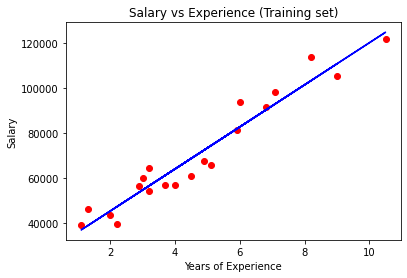

In [21]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

5. Visualizing the Test Set Results

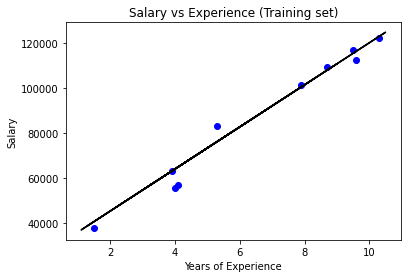

In [23]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

6. Model Evaluation for Test Dataset

In [24]:
from sklearn import metrics
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is %.2f'% mae)
print('MSE is %.2f'% mse)
print('R2 score is %.2f'% r2)

The model performance for testing set
--------------------------------------
MAE is 3426.43
MSE is 21026037.33
R2 score is 0.97
